In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Get data

In [3]:
x, y = load_digits(return_X_y=True)

In [4]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
y

array([0, 1, 2, ..., 8, 9, 8])

Split Data

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
# x_train: the part of x used to fit the model
# x_test: the part of x used to evaluate the model
# y_train: the part of y that corresponds to x_train
# y_test: the part of y that corresponds to x_test

Scale data

In [7]:
# fit_transform() fits the instance of StandardScaler to the array passed as the argument,
#  transforms this array, and returns the new, standardized array. 

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)


Create a Model and Train it

In [9]:
#  the one-vs-rest (OvR) scheme if the 'multi_class' option is set to 'ovr'.
#  It uses the cross-entropy loss if the 'multi_class' option is set to 'multinomial'.

In [10]:
model = LogisticRegression(solver = 'liblinear',C=0.05,multi_class='ovr', random_state=0)
model.fit(x_train,y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [11]:
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

Evaluate The Model

In [12]:
# if you’ve decided to standardize x_train, 
# then the obtained model relies on the scaled data, so x_test should be scaled as well with the same instance of StandardScaler

In [13]:
x_test = scaler.transform(x_test)

In [14]:
y_pred = model.predict(x_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       9, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 1, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 7, 8, 0, 1, 5, 2, 5, 3, 4, 1, 7, 0, 6, 1, 5, 9, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 7, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 7, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 3, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       3, 7, 2, 7, 8, 5, 5, 7, 5, 3, 2, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 1, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

Obtain Accuracy with .score()

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_test,y_pred)


0.9416666666666667

In [17]:
model.score(x_test, y_test)
# test set accuracy is more relevant for evaluating the performance on unseen data since it’s not biased.

0.9416666666666667

In [18]:
model.score(x_train,y_train)
# the training set accuracy is much higher might indicate overfitting.

0.964509394572025

Confusion matrix()

In [19]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]])

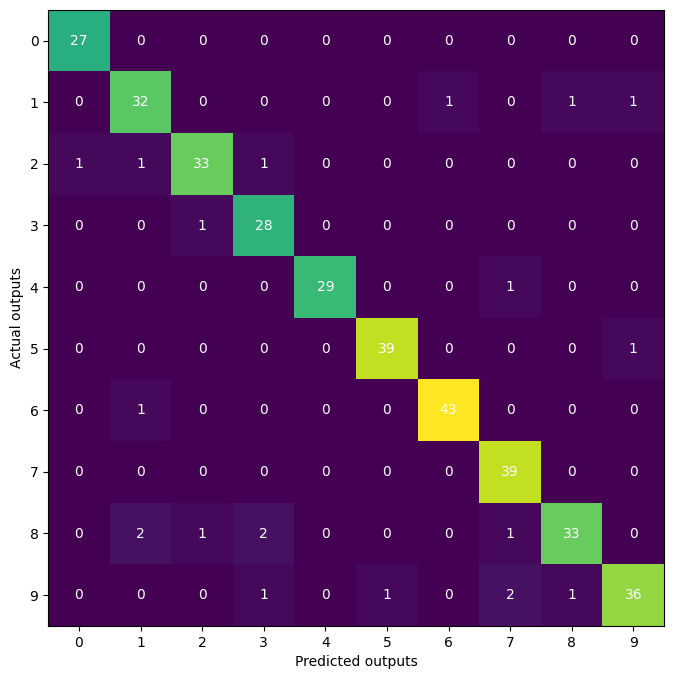

In [21]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs',fontsize = 10, color='black')
ax.set_ylabel('Actual outputs',fontsize = 10, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5,-0.5)
for i in range(10):
    for j in range(10):
        ax.text(j,i, cm[i,j],ha = 'center',va = 'center',color = 'white' )

plt.show()

In [23]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

